In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=6)

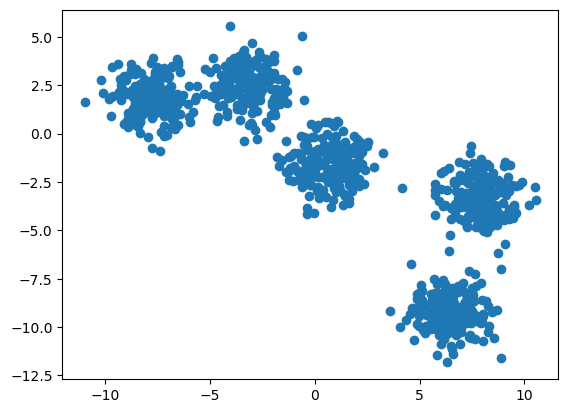

In [3]:
#plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [4]:
# Step 1: Initialise cluster with random centers

In [5]:
k=5
colors=['green','blue','red','black','orange']
clusters={}
for each_cluster in range(k):
    center=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':colors[each_cluster]
    }
    clusters[each_cluster]=cluster

## 10*(2*np.random.random((x.shape[1],))-1) EXPLANATION
##### np.random.random((2,)) → Generates something like [0.73, 0.15] → Range: [0, 1)
##### 2 * np.random.random(...) → Doubles each value: [1.46, 0.30] → Range: [0, 2)
##### Subtract 1 → [1.46, 0.30] - 1 → [0.46, -0.70] → Range: [-1, 1)
##### Multiply by 10 → [0.46, -0.70] * 10 → [4.6, -7.0] → Final range: [-10, 10)

In [6]:
clusters

{0: {'center': array([-1.4542748 , -3.92190053]),
  'points': [],
  'color': 'green'},
 1: {'center': array([2.07324464, 3.67053954]), 'points': [], 'color': 'blue'},
 2: {'center': array([ 4.54146237, -2.30836548]),
  'points': [],
  'color': 'red'},
 3: {'center': array([ 4.34453523, -8.99482351]),
  'points': [],
  'color': 'black'},
 4: {'center': array([ 6.5303075 , -2.80750298]),
  'points': [],
  'color': 'orange'}}

In [7]:
# Step 2: Distance and assigning points to each cluster

In [8]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [9]:
def assignPointsToClusters(clusters):
    for every_data_point in range(x.shape[0]):
        dist=[] #Reset for each point
        for kx in range(k):
            d=distance(x[every_data_point],clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point]) 

In [10]:
# Step 3: Maximisation
# Update your cluster center by taking mean

In [11]:
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if (pts.shape[0]>0):
            # we'll find out the mean
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]

In [12]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if (pts.shape[0]>0):
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='violet',marker='*')

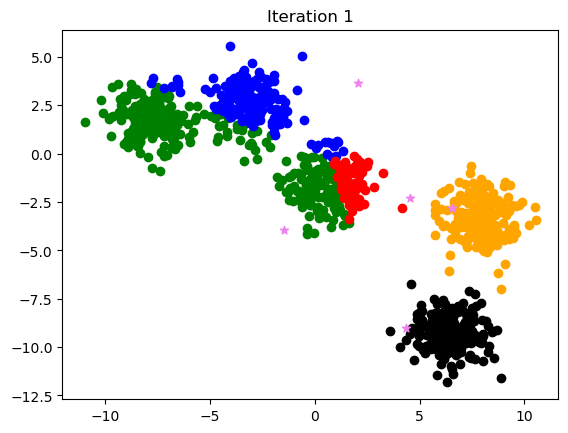

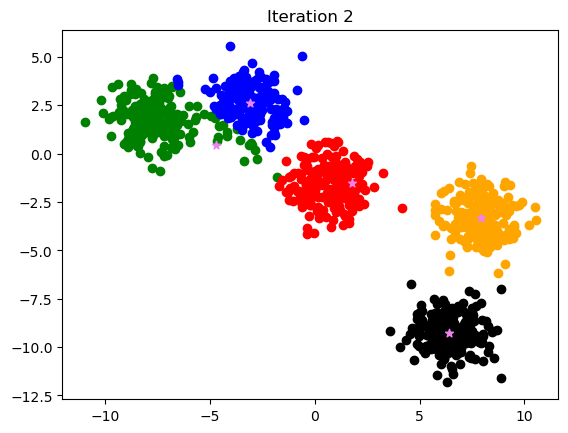

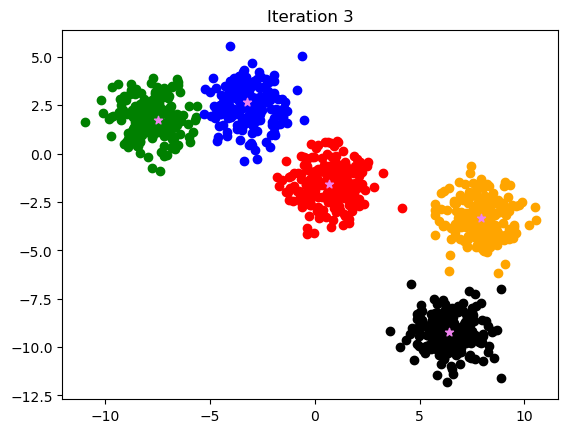

In [13]:
for i in range(3):  # or until convergence
    assignPointsToClusters(clusters)
    plotClusters(clusters)
    plt.title(f"Iteration {i+1}")
    plt.show()  # <-- This forces the plot to render each time
    updateClusters(clusters)